<strong><h1> Notebook Bode et fonctions de transfert</h1></Strong>

<h2>Etape 1 :  Déclaration de la fonction de transfert </h2>
<font size =4 font="Verdana">
Exemple : H(s) = s^2+3s+4 / (s^2+2s+5)
<br><br>
<strong>Remarque :</strong><br>
Python utilise alors en interne:TransferFunctionContinuous(array([ 1.,  3.,  3.]),array([ 1.,  2.,  1.]),dt: None)


In [1]:
from scipy import signal
num = [1, 3, 4]  #correspond aux coefficients devant chaque degré du numérateur
den = [1, 2, 5]  #idem pour le dénominateur

signal.TransferFunction(num, den)



TransferFunctionContinuous(
array([ 1.,  3.,  4.]),
array([ 1.,  2.,  5.]),
dt: None
)

<font size =4 font="Verdana">
<h2>Exemple 2 :</h2><br> Déclaration de la même fonction de transfert avec un temps d'échantillonnage de 0,1 seconde.
<br><br>
<strong>Remarque :</strong><br>
python utilise alors en interne:TransferFunctionDiscrete ( array ([1., 3., 3.]), array ([1., 2., 1.]), dt: 0.1 )

 

In [2]:
from scipy import signal
num = [1, 3, 3]
den = [1, 2, 1]

signal . TransferFunction ( num ,  den ,  dt = 0.1 ) 

TransferFunctionDiscrete(
array([ 1.,  3.,  3.]),
array([ 1.,  2.,  1.]),
dt: 0.1
)

<font size =5 font="Verdana">
<h1>Etape 2 : Construction du Bode, après déclaration de la fonction de transfert 
</h1></font><font size =5 font="Verdana"><br> Un exemple de code permettant de tracer un Bode pour H(s)=2/(1+s)

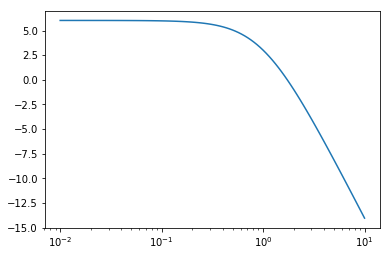

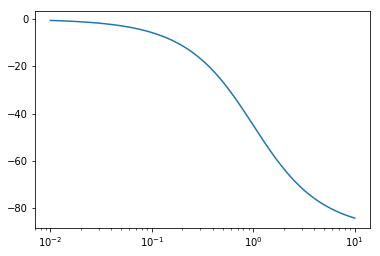

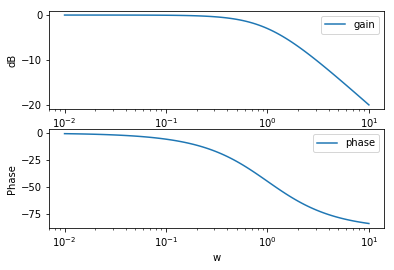

In [3]:


from scipy import signal
import matplotlib.pyplot as plt

#code minimal
sys = signal.TransferFunction([2], [1, 1])
w, mag, phase = sys.bode() #on demande à Python les valeurs du système
plt.figure()
plt.semilogx(w, mag)    # Bode gain en dB
plt.figure()
plt.semilogx(w, phase)  # Bode phase
plt.show()

#code amélioré (pour spyder notamment)
sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = sys.bode()
plt.figure('Bode')
plt.subplot(211)#coupe l'affichage en deux verticalement et spécifie qu'on va afficher en haut
plt.semilogx(w, mag, label='gain')   
plt.xlabel('w') #nom des axes
plt.ylabel('dB') 
plt.legend()
plt.subplot(212, label="phase")#affichage sur la fenêtre du bas
plt.semilogx(w, phase, label='phase') 
plt.xlabel('w')
plt.ylabel('Phase')
plt.legend()#pour avoir les légendes des courbes

plt.show()


<font size =4 font="Verdana">
<h2>Calcul de marge de phase: </h2>

In [33]:
from scipy import signal
import numpy as np  #numpy pour le bode
 
sys = signal.TransferFunction([1.2], [1,2,2,0])
#pour 1.2/s(s^2+2s+2) (exemple du cours p101)
w, mag, phase = sys.bode()
#on demande à Python les valeurs du système
for i in range(len(mag)): 
    #on cherche quand parmi les valeurs de mag(le gain en dB) quel est l'indice du 0 environ
    #si on souhaite augmenter la précision:
    #deux solutions : 
    #    1)on diminue l'intervalle d'encadrement de 0
    #    2) on augmente le nombre de points du système :
    # w, mag, phase = sys.bode(n=1000) où n est le nombre de points à calculer
    if(mag[i] >=-0.3 and mag[i]<0.3):
        marge_de_phase=(180+phase[i])
        #on calcul la mage de phase à partir de la phase correspondant à un gain de dB
        #Mφ = Arg(F(jω0dB)) + 180 
        break;
        #on quitte la boucle une fois qu'on a trouvé
for i in range(len(phase)): 
    if(phase[i] >=-180-2 and phase[i]<=-180+2):
        marge_de_gain=-mag[i]
        #si besoin augmenter l'écart
        break;
        #marge de gain= -20log(GB(jwc)) avec wc tel que Arg(GBO(jwc))=-180
print("La marge de phase de ce système est :",marge_de_phase, "degrés");
print("La marge de gain de ce système est :",marge_de_gain," dB");

La marge de phase de ce système est : 55.6173084821 degrés
La marge de gain de ce système est : 10.4976271186  dB


Remarque: <br>on peut aisément calculer une fréquence de coupure (en recherchant gain=max(gain)/2^0.5 (racine de 2) au lieu de rechercher gain=0, et en affichant w[i] comme ci-dessous

In [5]:
from scipy import signal
import numpy as np  #numpy pour le bode
 
sys = signal.TransferFunction([2], [1, 1])
w, mag, phase = sys.bode()
#on demande à Python les valeurs du système
for i in range(len(mag)): 
    if (mag[i]>=np.max(mag)/2**0.5-0.1 and mag[i]<=np.max(mag)/2**0.5+0.1):
        print(w[i]);
        break;

0.705480231072


<font size =4 font="Verdana">
<h2>Calcul de diagramme de Black: </h2>

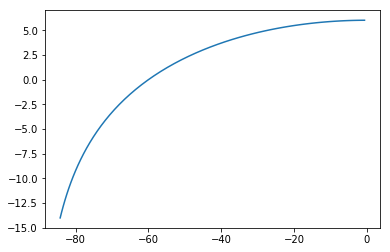

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np  #numpy pour le bode
 
sys = signal.TransferFunction([2], [1, 1])
w, mag, phase = sys.bode()

plt.plot(phase,mag)
#on affiche l'amplitude en fonction de la phase
plt.show()

<font size =4 font="Verdana">
<h2>Exemple : </h2>

<font size =4 font="Verdana">&Eacute;crivez le code python permettant d'obtenir la phase et le gain pour un signal d'entrée échellon, à une pulsation donnée de la fonction <br> de transfert suivante: <br><br> G(s) = 2 / (s+3) </font>
<details>
    <summary>&#9658; Solution</summary> 
<p>from scipy import signal
<br>
sys = signal.TransferFunction([2], [1, 3])<br>
w=float(input("choisissez une pulsation :"))<br>

w1, mag, phase = signal.bode(sys,w)<br>
print("Pour une pulsation de",w,"et cette fonction de transfert, on a \n phase:",phase,"\n 
gain :",mag)<br>
</p>
</details>
</div>

<font size =4 font="Verdana">&Eacute;crivez le code python permettant d'afficher le gain pour toutes les pulsations de la fonction <br> de transfert suivante: <br><br> G(s) = 2 / (s+3) </font>
<details>
    <summary>&#9658; Solution</summary> 
<p>from scipy import signal
<br>
sys = signal.TransferFunction([2], [1, 3])<br>

w1, mag, phase = signal.bode(sys)<br>
print(mag)<br>
</p>
</details>
</div>

In [7]:
from scipy import signal
sys = signal.TransferFunction([2], [1, 3])

w1, mag, phase = signal.bode(sys)
print(mag)

[ -3.526648    -3.52711793  -3.52763362  -3.52819952  -3.52882051
  -3.52950194  -3.53024969  -3.5310702   -3.53197052  -3.53295842
  -3.53404237  -3.53523169  -3.5365366   -3.53796828  -3.53953901
  -3.54126222  -3.54315267  -3.54522648  -3.54750134  -3.54999663
  -3.55273356  -3.55573536  -3.55902743  -3.56263762  -3.56659634
  -3.57093687  -3.57569562  -3.58091235  -3.5866305   -3.5928975
  -3.59976514  -3.60728989  -3.61553331  -3.62456248  -3.63445042
  -3.64527658  -3.6571273   -3.67009633  -3.68428539  -3.69980469
  -3.71677352  -3.73532079  -3.75558564  -3.77771799  -3.80187909
  -3.82824207  -3.85699239  -3.8883283   -3.92246117  -3.95961574
  -4.00003027  -4.04395653  -4.09165962  -4.14341758  -4.19952078
  -4.26027109  -4.3259807   -4.39697072  -4.47356937  -4.5561099
  -4.64492818  -4.74035989  -4.8427375   -4.95238688  -5.06962377
  -5.19474998  -5.32804964  -5.46978529  -5.62019416  -5.77948467
  -5.94783313  -6.12538094  -6.31223225  -6.50845221  -6.71406585
  -6.9290576

<font size =4 font="Verdana">&Eacute;crivez le code python permettant d'afficher le gain pour des pulsations données pulsations de la fonction <br> de transfert suivante: <br><br> G(s) = 2 / (s+3) </font>
<details>
    <summary>&#9658; Solution</summary> 
<p>from scipy import signal
<br>
sys = signal.TransferFunction([2], [1, 3])<br>
w=[0,10,100,1000,10000] <br>
w1, mag, phase = signal.bode(sys,w)<br>
print(mag)<br>
</p>
</details>
</div>

In [8]:
from scipy import signal
sys = signal.TransferFunction([2], [1, 3])
w=[0,10,100,1000,10000] 
w1, mag, phase = signal.bode(sys,w)
print(mag)

[ -3.52182518 -14.35366507 -33.98330698 -53.97943917 -73.97940048]
